In [32]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


2024-06-23 13:58:23.157096: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-23 13:58:23.202685: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 13:58:23.562743: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [33]:
target_path = '/media/shuhang/T8/projects/RA/dalian/evaluate/_0_dalian_x10240_y3840.tif_label.npy'
output_path = '/media/shuhang/T8/projects/RA/dalian/evaluate/_0_dalian_x10240_y3840.tif_out.npy'

In [34]:
target = np.load(target_path)
out = np.load(output_path)
target = target/256*20
out = out/256*20
print(target )
print(out )

[[[12. 12. 12. ... 12. 12. 12.]
  [12. 12. 12. ... 12. 12. 12.]
  [ 0.  0.  0. ... 12. 12. 12.]
  ...
  [12. 12.  0. ...  0.  0.  0.]
  [12. 12. 12. ...  0.  0.  0.]
  [12. 12. 12. ...  0.  0.  0.]]]
[[[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  0. ... 12. 12.  0.]
  [ 0.  0.  0. ... 12. 12. 12.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]]


In [54]:
acc = (target == out)
print(acc.sum()/(256*256))

0.7570648193359375


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[[19080  2278     0     0     0   223     0     0     0   269     0     0
   2925     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  189     0     0     0     0   712     0     0     0   264     0     0
      0     0     0     8     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   

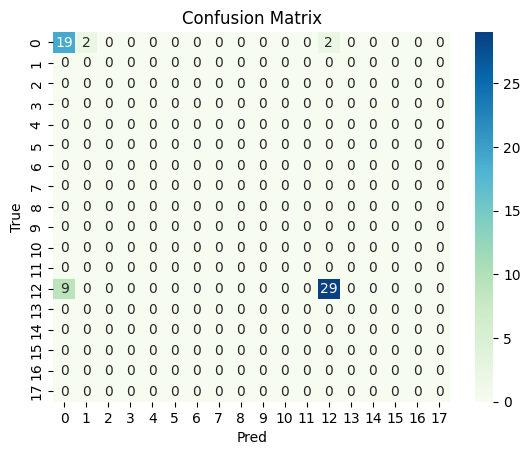

In [48]:
target = target.flatten().astype(int)
out = out.flatten().astype(int)
num_class = 18
scall_para = 1000
confusion = confusion_matrix(target,out,labels=[i for i in range(num_class)])
print(confusion)
confusion = (confusion/scall_para).astype(int)
print(confusion)
classes = range(num_class)

sns.heatmap(data=confusion, annot=True,
            xticklabels=classes,
            yticklabels=classes,
            cmap='GnBu')

plt.xlabel('Pred')
plt.ylabel('True')
plt.title('Confusion Matrix')
# plt.show()
plt.savefig('confusion.jpg')

In [76]:
import glob
out_all = []
label_all = []

[[ 841073   63093       0       0       0  193210       0   39382   13040
    14163       0       0     126   94480       0 2390681   23263    1026]
 [      0       0       0       0       0       0       0       0       0
        0       0       0       0       0       0       0       0       0]
 [      0       0       0       0       0       0       0       0       0
        0       0       0       0       0       0       0       0       0]
 [      0       0       0       0       0       0       0       0       0
        0       0       0       0       0       0       0       0       0]
 [      0       0       0       0       0       0       0       0       0
        0       0       0       0       0       0       0       0       0]
 [ 204839   16818       0       0       0   57063       0   13216    3643
     3773       0       0      44   27106       0  709439    5831     253]
 [      0       0       0       0       0       0       0       0       0
        0       0       0       

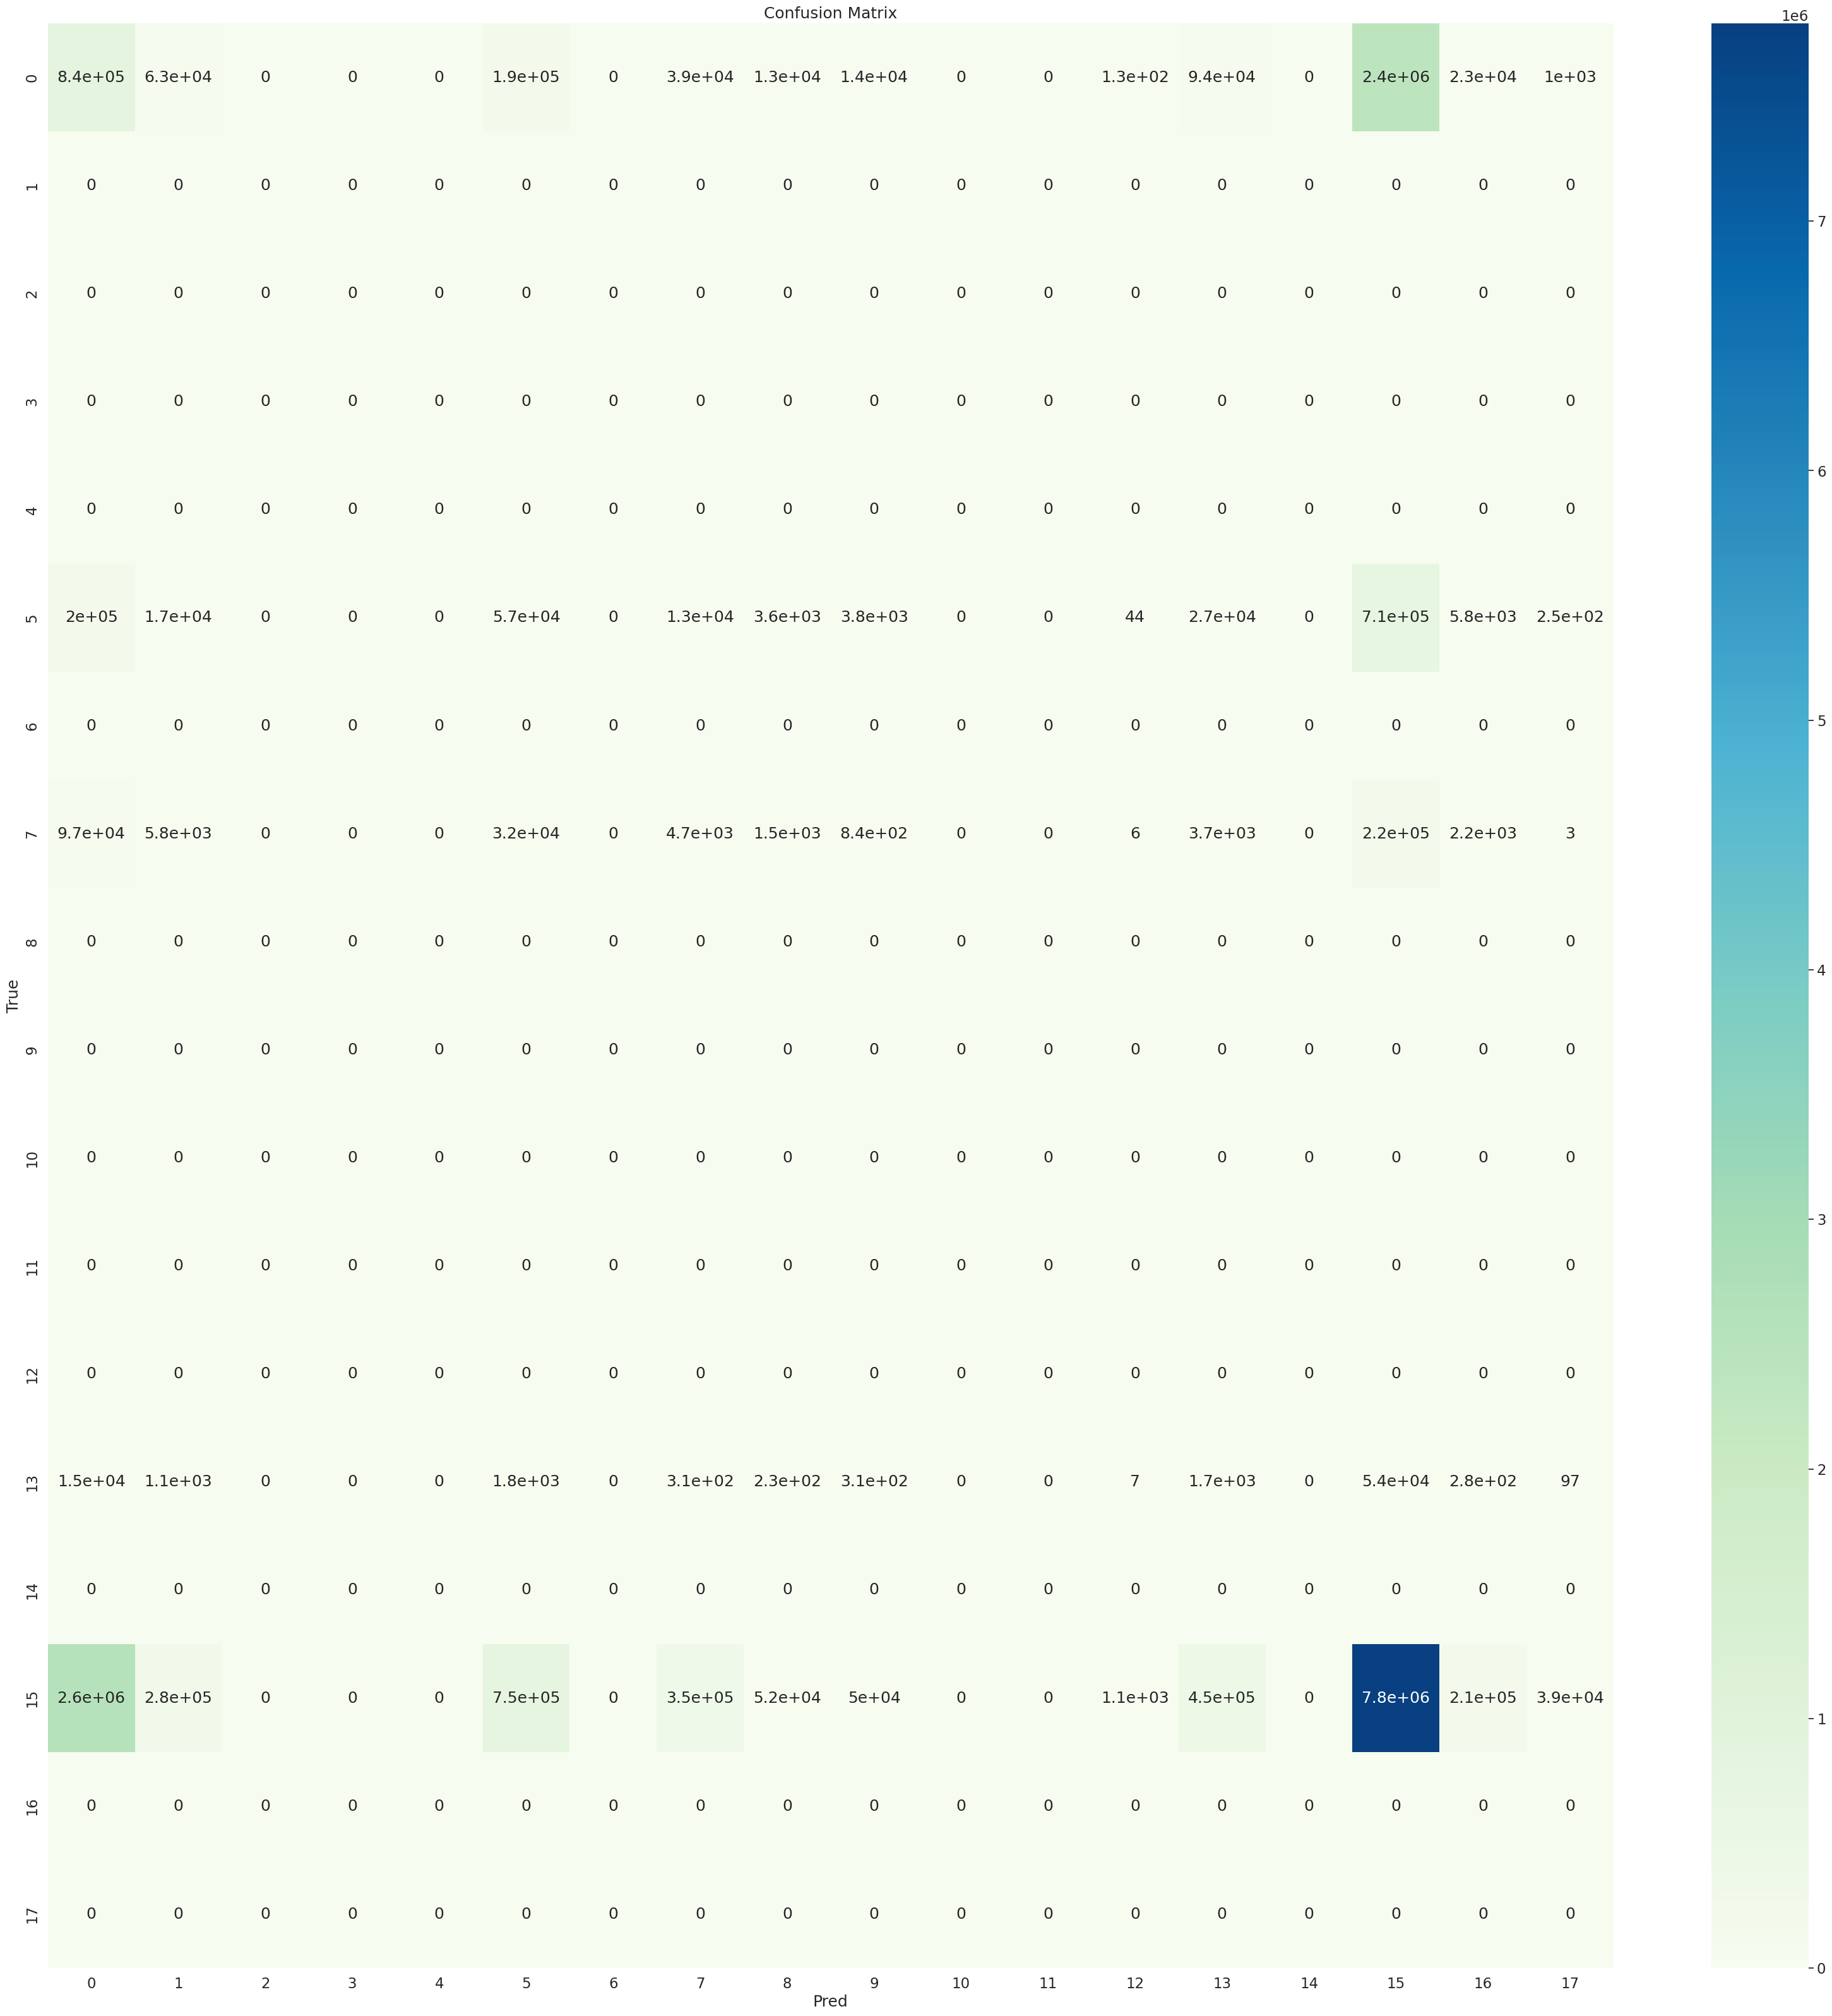

In [77]:
root_path = '/media/shuhang/T8/projects/RA/dalian/evaluate_18'
out_all_path = glob.iglob(root_path+'/*out.npy')
label_all_path = glob.iglob(root_path+'/*label.npy')
for out_path in out_all_path:
    out = np.load(out_path)
    out = out/256*20
    out_all.append(out)
for label_path in label_all_path:
    label = np.load(label_path)
    label = label/256*20
    label_all.append(label)
out_all_np = np.array(out_all)
label_all_np = np.array(label_all)
target = out_all_np.flatten().astype(int)
out = label_all_np.flatten().astype(int)

batchsize = len(out_all_np)
num_class = 18
scall_para = 1000 * batchsize

confusion = confusion_matrix(target,out,labels=[i for i in range(num_class)])
print(confusion)
# #scale the cnofusion matrix
# confusion = (confusion/scall_para).astype(int)
print(confusion)
classes = range(num_class)
plt.figure(figsize=(40, 40))

sns.heatmap(data=confusion, annot=True,
            xticklabels=classes,
            yticklabels=classes,
            cmap='GnBu')

plt.xlabel('Pred')
plt.ylabel('True')
plt.title('Confusion Matrix')
# plt.show()
plt.savefig('confusion.jpg')